# As class starts go to

## https://johnlaudun.net/

## Click on "logbook"

## Click on link in top post "Test File"

# Comparing Texts

In [1]:
# IMPORTS
import nltk, re

# Open and read the file to create a string object
mdg_string = open('../data/mdg.txt', 'r').read()
# Create a list of substrings, aka words
mdg_words = re.sub("[^a-zA-Z']"," ", mdg_string).lower().split()

# Repeat for "Heart of Darkness"
hod_string = open('../data/hod.txt', 'r').read()
hod_words = re.sub("[^a-zA-Z']"," ", hod_string).lower().split()

In [2]:
mdg_dist = nltk.FreqDist()
for word in mdg_words:
    mdg_dist[word] +=1

mdg_dist.most_common(10)

[('the', 512),
 ('a', 258),
 ('he', 248),
 ('of', 172),
 ('and', 164),
 ('i', 155),
 ('to', 148),
 ('was', 140),
 ('his', 137),
 ('rainsford', 117)]

In [3]:
# We can work with freq_dist like any list of tuples

for word, frequency in mdg_dist.most_common(10):
    print(f"{word}:  {frequency}")

the:  512
a:  258
he:  248
of:  172
and:  164
i:  155
to:  148
was:  140
his:  137
rainsford:  117


### Lexical Diversity

In [4]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv

In [5]:
# Note how you can run a function inside an f-string.
# Also note the use of backslashes to escape the quotation marks.
print(f"The lexical diversity of \"The Most Dangerous Game\" is {lex_div(mdg_words):.3f}")

The lexical diversity of "The Most Dangerous Game" is 0.243


In [6]:
print(f"The lexical diversity of \"Heart of Darkness\" is {lex_div(hod_words):.3f}")

The lexical diversity of "Heart of Darkness" is 0.143


In [7]:
# We need a more robust function to handle a series of files
def lex_div(a_file):
    # open and read the file
    the_string =  open(a_file, 'r').read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / len (the_words)
    # return this percentra
    return lexdiv

In [8]:
data = ["A", "B", "C", "D", "E", "F", "G", "H"]

for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    lexdiv = lex_div(the_file)
    print(f"{i}: {lexdiv:.3f}")

A: 0.326
B: 0.308
C: 0.233
D: 0.283
E: 0.237
F: 0.284
G: 0.259
H: 0.246


*Hmmm* ... that's quite a range. Referring to the lexical diversities for "The Most Dangerous Game" and _Heart of Darkness_, what do you think is at work there? 

What happens if we add a text as a data point?

In [9]:
hamlet = "../data/hamlet.txt"
lex_div(hamlet)

0.13837755875663382

<div class="alert alert-block alert-warning">
<b>Your turn:</b> Write code that explores the possible dimension in play here.
</div>

In [10]:
# We could do this as two lists using code we already know
# "uk" stands for "unknown" because we don't know these texts!

# We already had the lexdiv code
uk_lexdiv = []
for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    lexdiv = lex_div(the_file)
    uk_lexdiv.append(lexdiv)

# And we can re-use part of the lexdiv code to get this
uk_lengths = []
for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    the_string =  open(the_file, 'r').read()
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    the_length = len(the_words)
    uk_lengths.append(the_length)

print (uk_lexdiv)
print(uk_lengths)



[0.3260437375745527, 0.3077855930147951, 0.23287350946925414, 0.28325647392692443, 0.23655913978494625, 0.2843100189035917, 0.25941612464075026, 0.24635693468198183]
[1509, 4123, 8554, 5638, 6324, 7935, 6611, 5833]


In [11]:
def len_lexdiv(a_file):
    # open and read the file
    the_string =  open(a_file, 'r').read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # get the length of the text in words
    the_length = len(the_words)
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / the_length
    # return the length and the percentage
    return the_length, lexdiv

In [ ]:

def len_lexdiv(a_file):
    # open and read the file
    the_string =  open(a_file, 'r').read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # get the length of the text in words
    the_length = len(the_words)
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / the_length
    # return the length and the percentage
    return the_length, lexdiv

In [12]:
len_lexdiv('../data/mdg.txt')

(8017, 0.24285892478483223)

In [14]:
lendivs = []
for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    (x, y) = len_lexdiv(the_file)
    lendivs.append((x,y))

print(lendivs)

[(1509, 0.3260437375745527), (4123, 0.3077855930147951), (8554, 0.23287350946925414), (5638, 0.28325647392692443), (6324, 0.23655913978494625), (7935, 0.2843100189035917), (6611, 0.25941612464075026), (5833, 0.24635693468198183)]


In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)


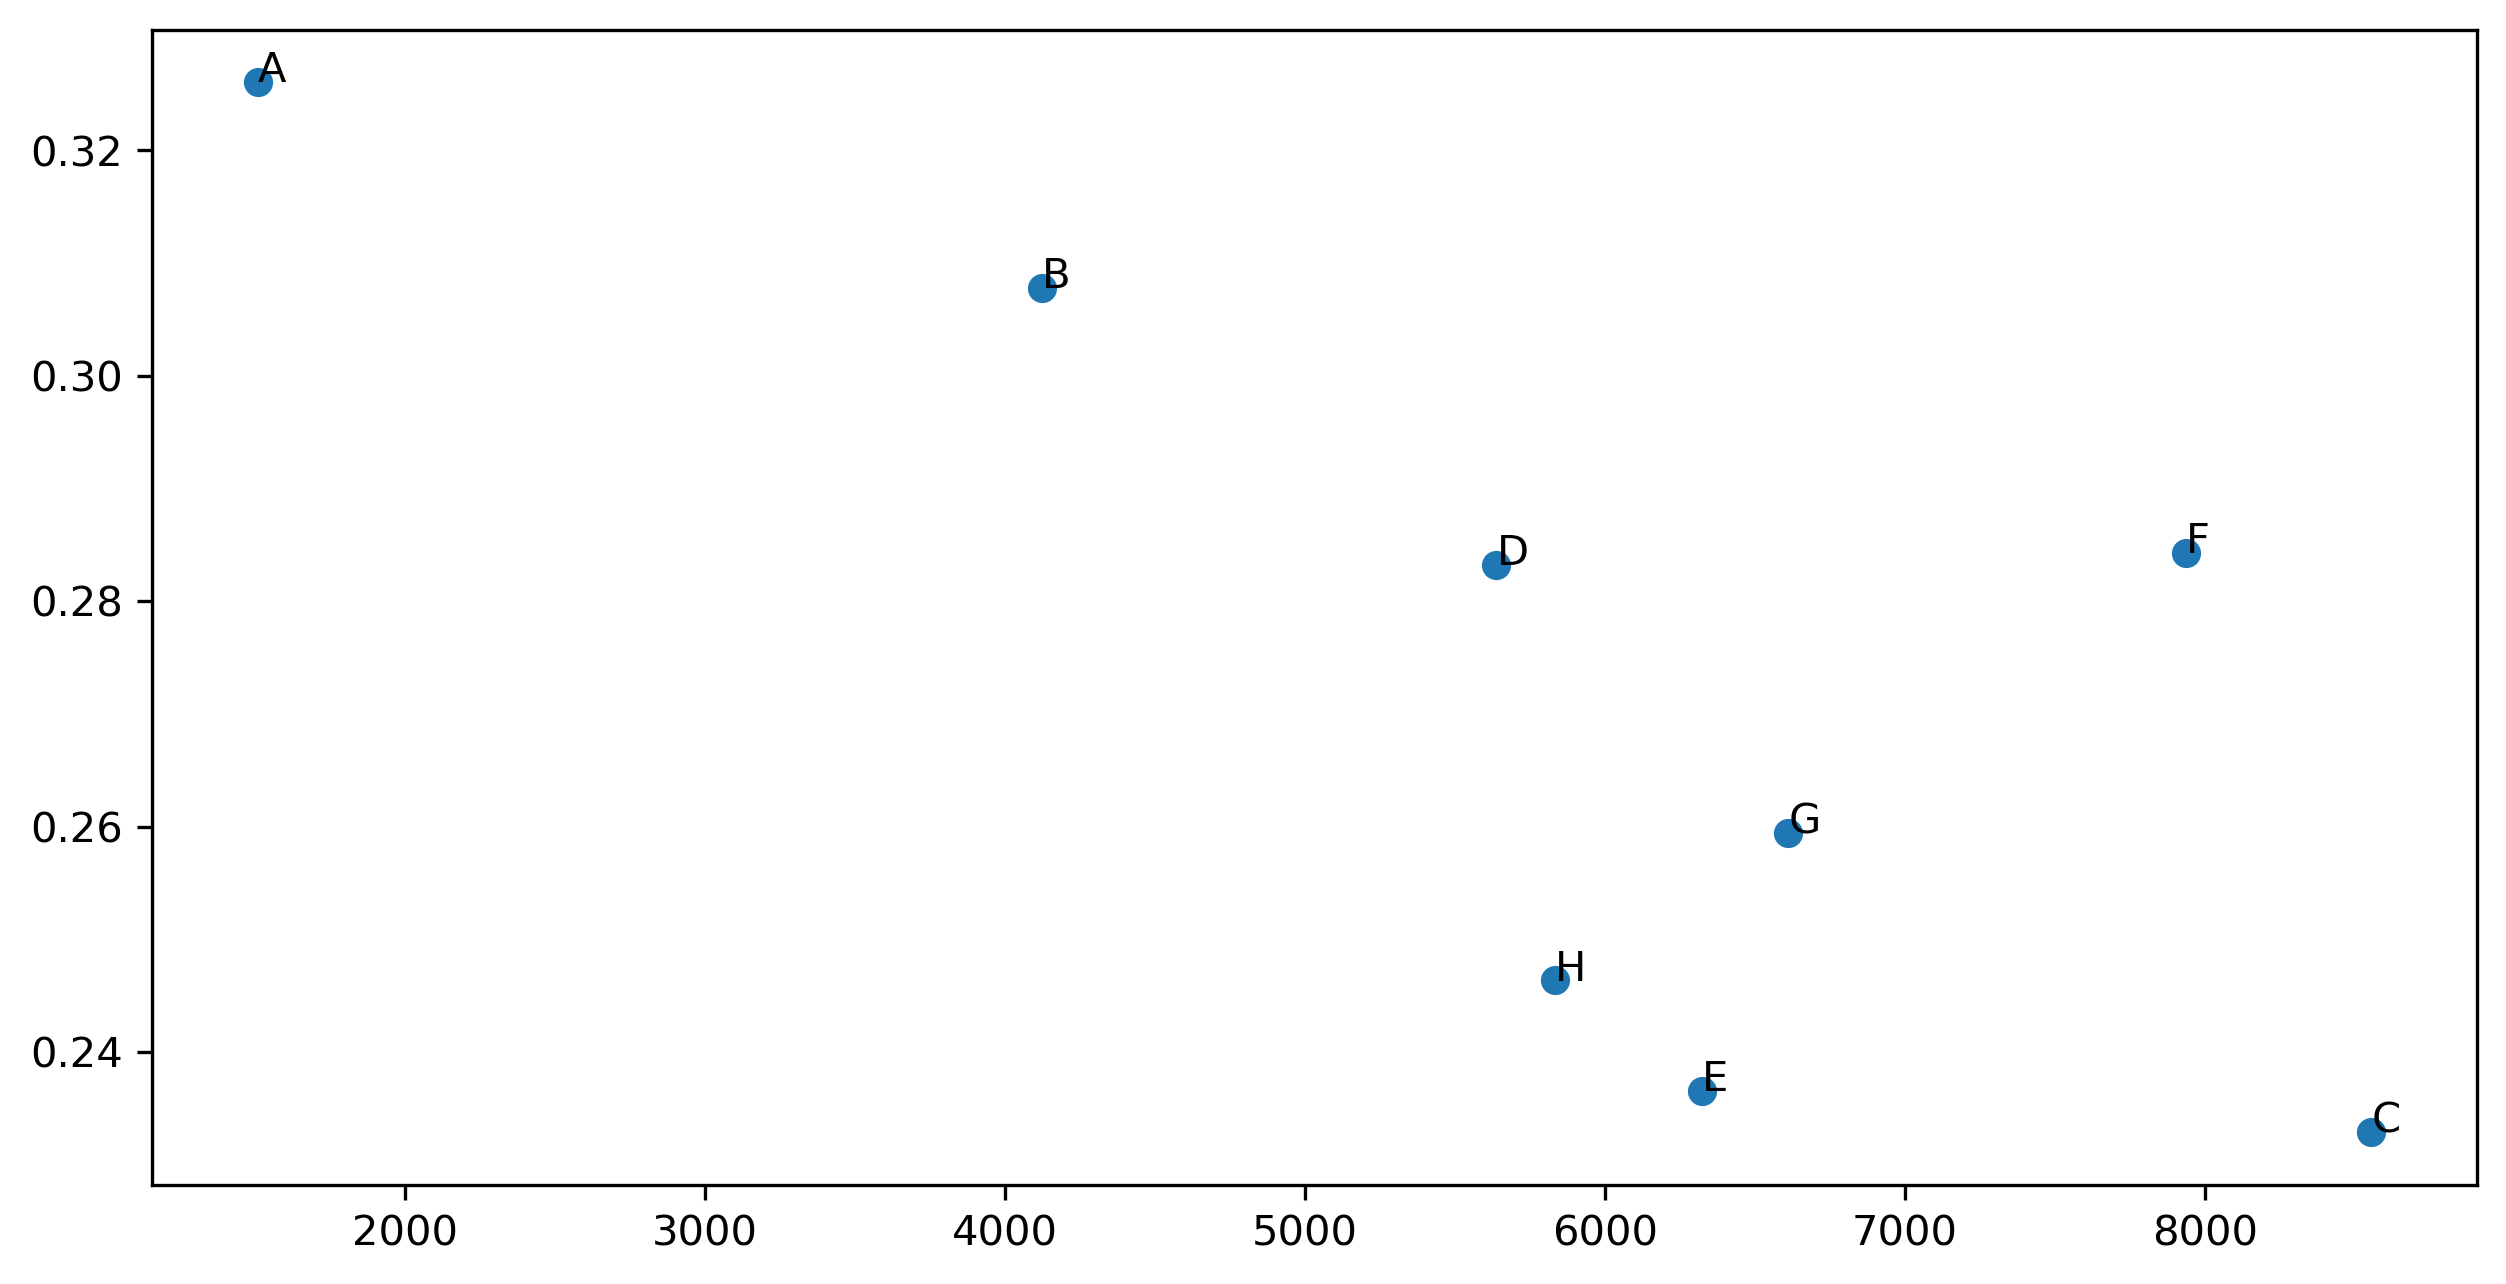

In [16]:
# The usual way to break a tuple into two lists using list comprehensions
# Good for making the values available later in a clear, labeled way
x_val = [x[0] for x in lendivs]
y_val = [x[1] for x in lendivs]
for i, label in enumerate(data):
    plt.annotate(label, (x_val[i], y_val[i]))
plt.scatter(x_val,y_val)
# The short way (Comment out plt.scatter above and then uncomment below)
# plt.scatter(*zip(*lengths_diversities))
plt.show()

In [17]:
# Let's add MDG
lendivs.append(len_lexdiv('../data/mdg.txt'))
data.append("mdg")
print(lendivs[-2:])
print(data[-2:])

[(5833, 0.24635693468198183), (8017, 0.24285892478483223)]
['H', 'mdg']


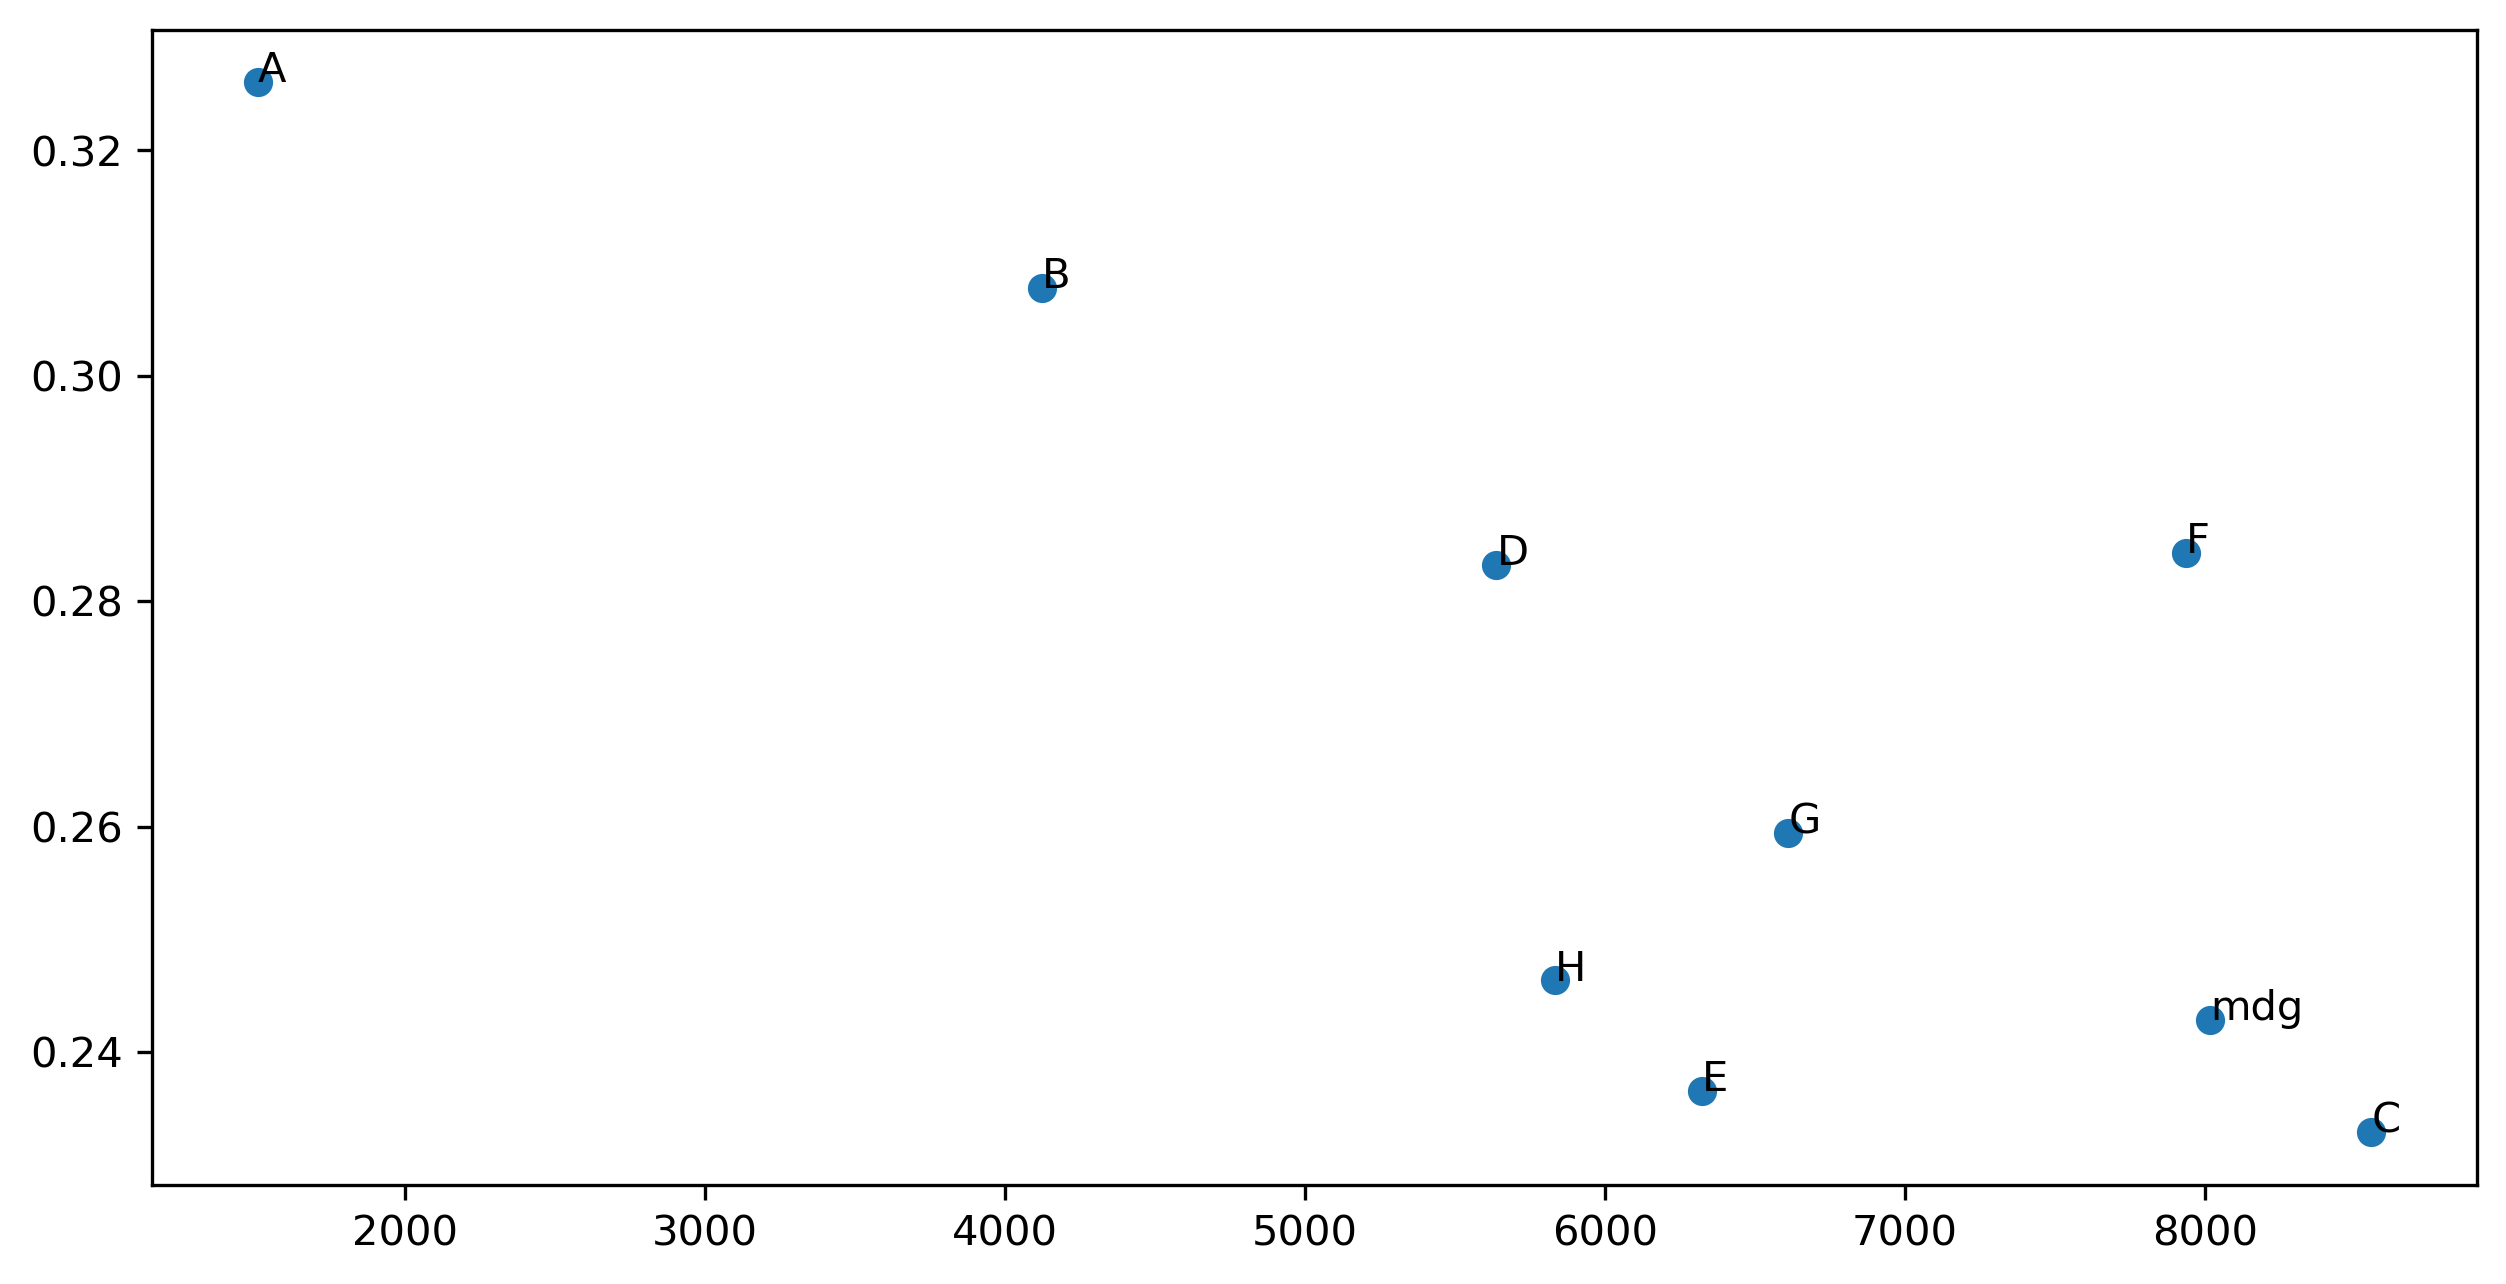

In [18]:
x_val = [x[0] for x in lendivs]
y_val = [x[1] for x in lendivs]
for i, label in enumerate(data):
    plt.annotate(label, (x_val[i], y_val[i]))
plt.scatter(x_val,y_val)

In [19]:
# Now let's add our two longer texts, HoD and Hamlet
texts = ["hod", "hamlet"]
longer = []
for i in texts:
    the_file = "../data/"+i+".txt"
    (x, y) = len_lexdiv(the_file)
    lendivs.append((x,y))
    data.append(i)

# Check our work
print(lendivs[-3:])
print(data[-3:])

[(8017, 0.24285892478483223), (39208, 0.14303203427871863), (32975, 0.13837755875663382)]
['mdg', 'hod', 'hamlet']


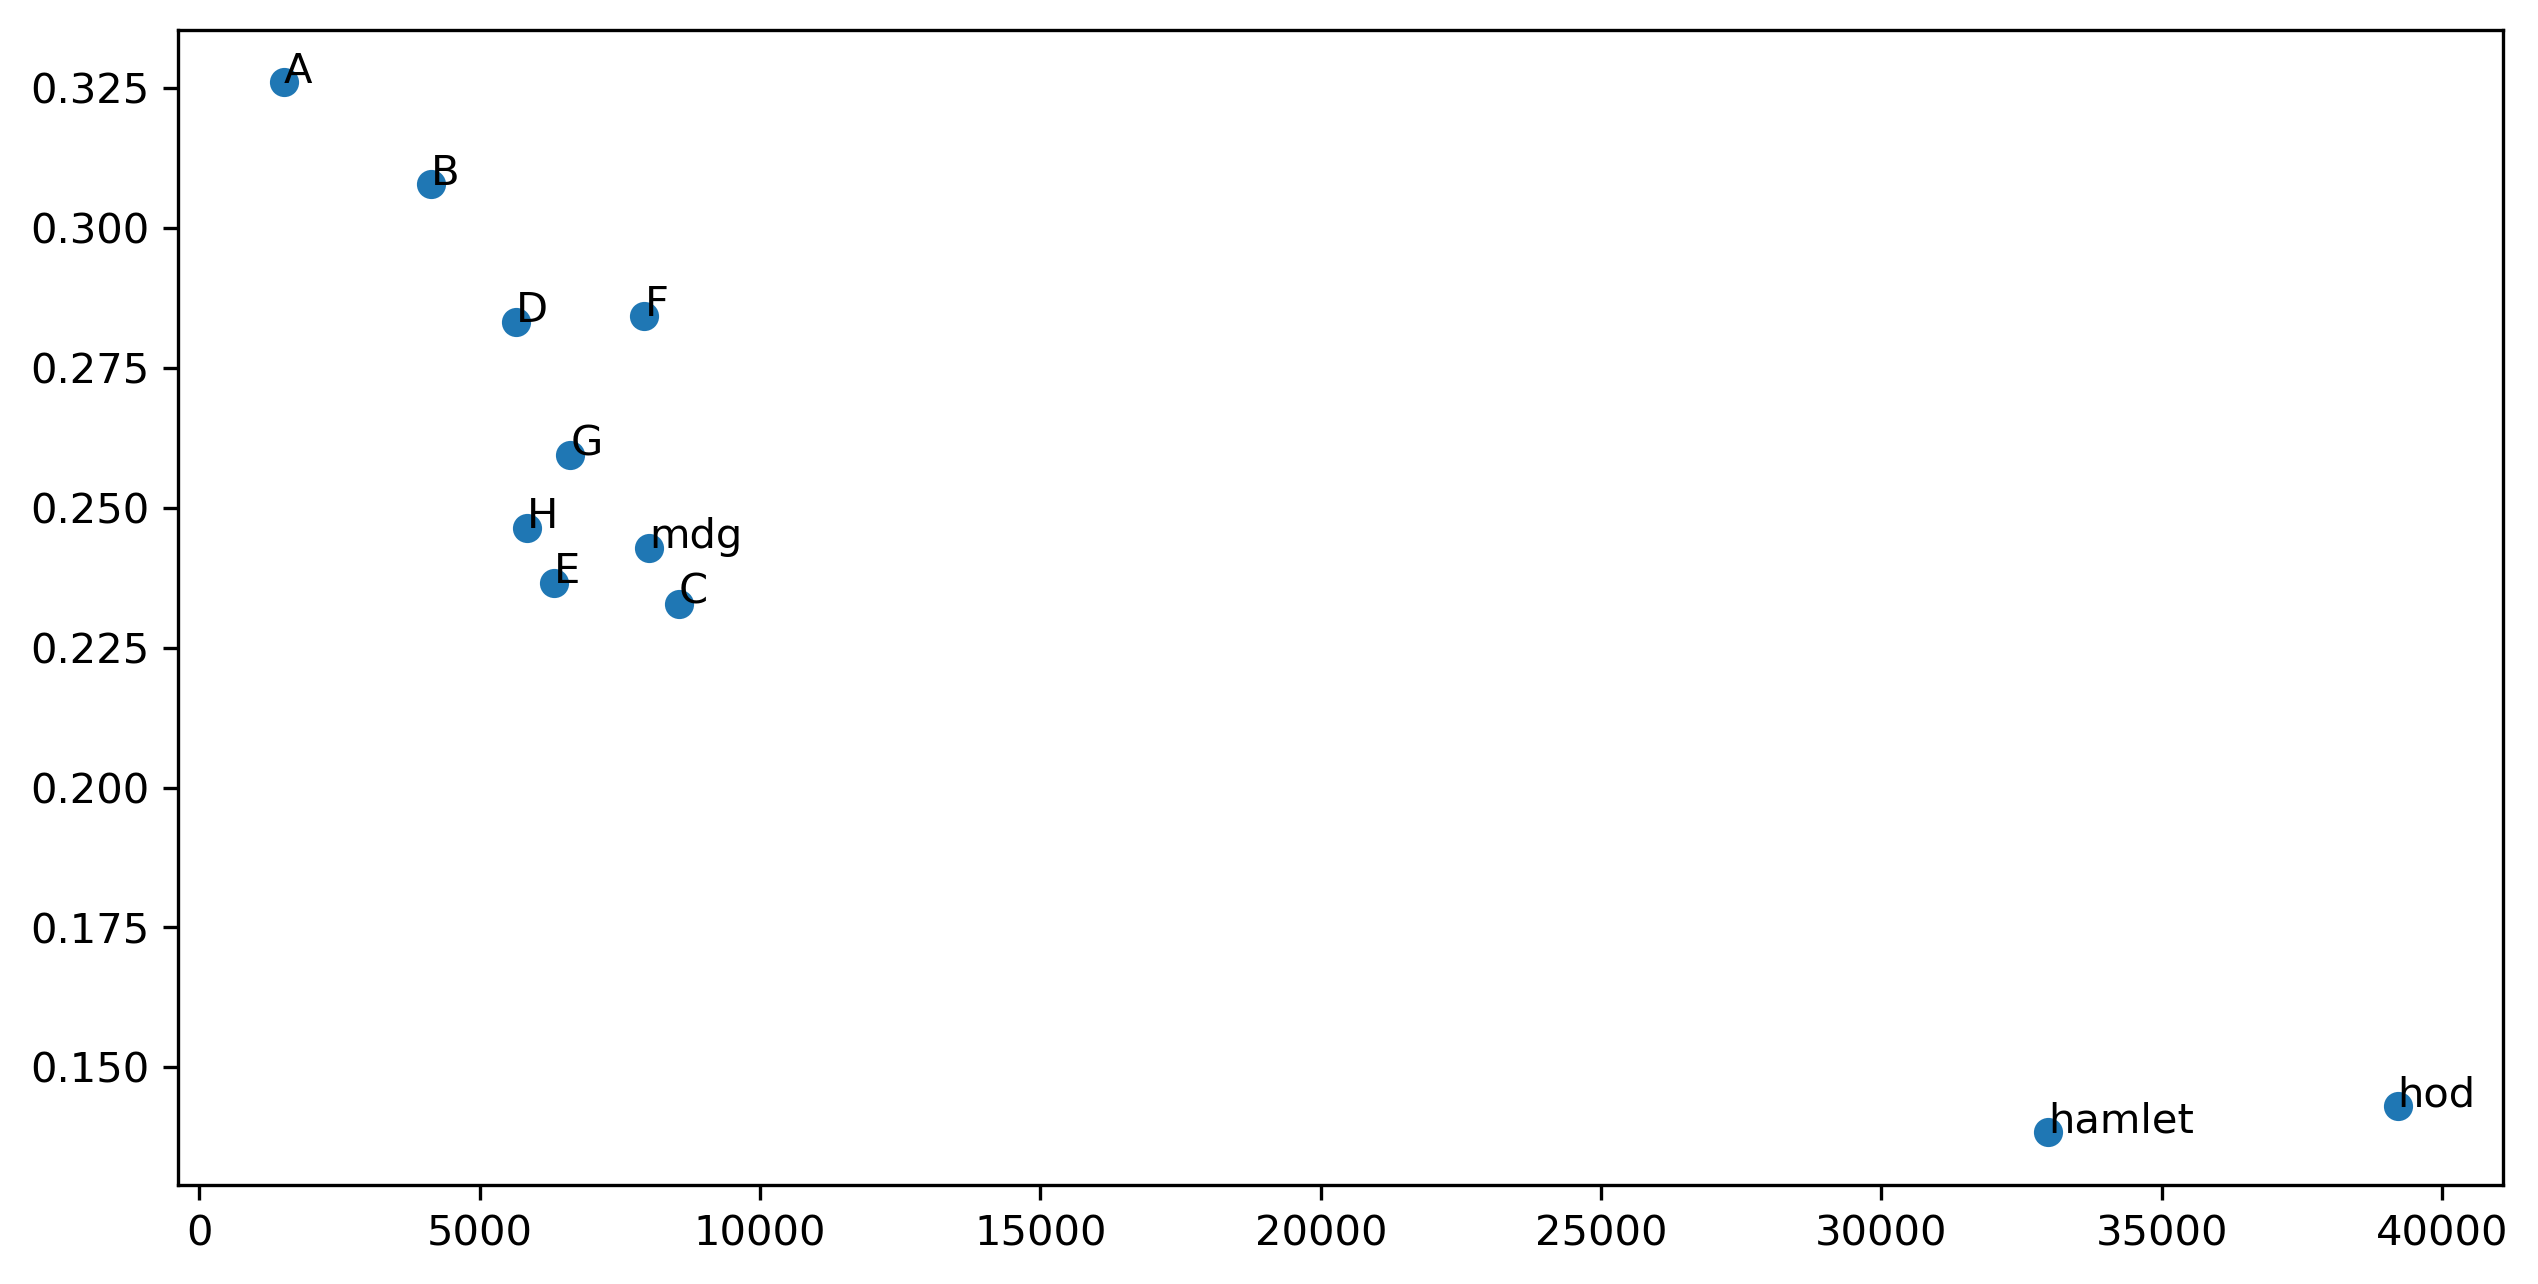

In [20]:
x_val = [x[0] for x in lendivs]
y_val = [x[1] for x in lendivs]
for i, label in enumerate(data):
    plt.annotate(label, (x_val[i], y_val[i]))
plt.scatter(x_val,y_val)

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(lendivs)
df.head()

,0,1
0,1509,0.326044
1,4123,0.307786
2,8554,0.232874
3,5638,0.283256
4,6324,0.236559


In [24]:
df.shape

(11, 3)

In [25]:
df["text"] = data
df.head(11)

,0,1,text
0,1509,0.326044,A
1,4123,0.307786,B
2,8554,0.232874,C
3,5638,0.283256,D
4,6324,0.236559,E
5,7935,0.284310,F
6,6611,0.259416,G
7,5833,0.246357,H
8,8017,0.242859,mdg
9,39208,0.143032,hod


In [26]:
# In general, list comprehensions are the most "readable" for me:
# df = df[ ['text'] + [ col for col in df.columns if col != 'text' ] ]

# But this is more pandas-like:
col = df.pop("text")
df.insert(0, col.name, col)

# As always, check our results:
print(df)

      text      0         1
0        A   1509  0.326044
1        B   4123  0.307786
2        C   8554  0.232874
3        D   5638  0.283256
4        E   6324  0.236559
5        F   7935  0.284310
6        G   6611  0.259416
7        H   5833  0.246357
8      mdg   8017  0.242859
9      hod  39208  0.143032
10  hamlet  32975  0.138378


In [27]:
df.columns = ['text', 'length','lexdiv']

In [28]:
# pandas really is the easiest way to write to CSV
df.to_csv("../data/texts1.csv")

In [31]:
df2 = pd.read_csv("../data/texts1.csv")
df2.head()

,text,length,lexdiv
0,A,1509,0.326044
1,B,4123,0.307786
2,C,8554,0.232874
3,D,5638,0.283256
4,E,6324,0.236559


In [30]:
df.to_csv("../data/texts1.csv", index = False)